In [145]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#Import Fifa dataset
df = pd.read_csv("data.csv")
df.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5391,5391,199352,S. Çinaz,32,https://cdn.sofifa.org/players/4/19/199352.png,Germany,https://cdn.sofifa.org/flags/21.png,70,70,Kayserispor,...,62.0,65.0,71.0,64.0,13.0,16.0,9.0,16.0,12.0,€2M
9610,9610,223673,M. Wostry,25,https://cdn.sofifa.org/players/4/19/223673.png,Austria,https://cdn.sofifa.org/flags/4.png,66,70,LASK Linz,...,55.0,64.0,70.0,67.0,6.0,14.0,8.0,15.0,14.0,€1.1M
8138,8138,225391,F. Guichón,27,https://cdn.sofifa.org/players/4/19/225391.png,Uruguay,https://cdn.sofifa.org/flags/60.png,67,67,Independiente Santa Fe,...,53.0,52.0,53.0,49.0,15.0,10.0,6.0,6.0,7.0,€1.1M
1776,1776,176993,Bojan,27,https://cdn.sofifa.org/players/4/19/176993.png,Spain,https://cdn.sofifa.org/flags/45.png,75,75,Stoke City,...,74.0,31.0,22.0,19.0,5.0,14.0,8.0,14.0,7.0,€13.3M
15544,15544,236406,M. Hamrol,24,https://cdn.sofifa.org/players/4/19/236406.png,Germany,https://cdn.sofifa.org/flags/21.png,59,65,Korona Kielce,...,27.0,10.0,11.0,12.0,60.0,58.0,48.0,58.0,61.0,€248K


In [147]:
#Splitting Dataset into 3 Categories(Forwards(ST,LW,RW), Midfielders(LM,CM,RM), Defenders(LB,CB,RB))
df_forwards = df[(df["Position"]=="LW") | (df["Position"]=="ST") | (df["Position"]=="RW")]
df_midfielders = df[(df["Position"]=="LM") | (df["Position"]=="CM") | (df["Position"]=="RM")]
df_defenders = df[(df["Position"]=="LB") | (df["Position"]=="CB") | (df["Position"]=="RB")]

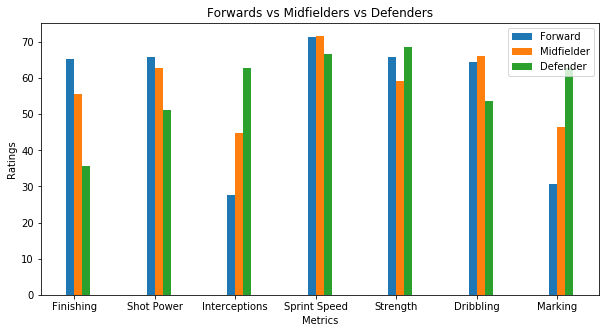

In [148]:
# Numbers of clusters
N = 7

# Data on X-axis

blue_bar = (df_forwards["Finishing"].mean(), df_forwards["ShotPower"].mean(), df_forwards["Interceptions"].mean(),df_forwards["SprintSpeed"].mean(), df_forwards["Strength"].mean(),
df_forwards["Dribbling"].mean(), df_forwards["Marking"].mean())
orange_bar = (df_midfielders["Finishing"].mean(), df_midfielders["ShotPower"].mean(), df_midfielders["Interceptions"].mean(),df_midfielders["SprintSpeed"].mean(), 
df_midfielders["Strength"].mean(),df_midfielders["Dribbling"].mean(), df_midfielders["Marking"].mean())
green_bar = (df_defenders["Finishing"].mean(), df_defenders["ShotPower"].mean(), df_defenders["Interceptions"].mean(),df_defenders["SprintSpeed"].mean(), 
df_defenders["Strength"].mean(),df_defenders["Dribbling"].mean(), df_defenders["Marking"].mean())

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1      

# Plotting
plt.bar(ind, blue_bar , width, label='Forward')
plt.bar(ind + width, orange_bar, width, label='Midfielder')
plt.bar(ind + 2*width, green_bar, width, label='Defender')

plt.xlabel('Metrics')
plt.ylabel('Ratings')
plt.title('Forwards vs Midfielders vs Defenders')
plt.xticks(ind + width /2, ('Finishing', 'Shot Power', 'Interceptions','Sprint Speed','Strength','Dribbling','Marking'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

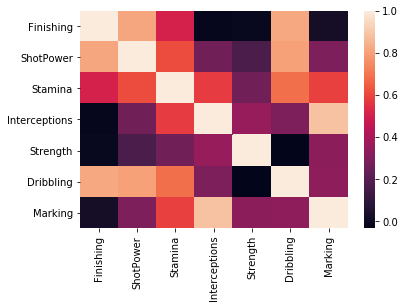

In [149]:
df_filtered = df[["Finishing","ShotPower","Stamina","Interceptions","Strength","Dribbling","Marking"]]
correlationMatrix = df_filtered.corr()
sns.heatmap(correlationMatrix)